In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [0]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
from google.colab import files

uploaded = files.upload()

Saving Hitter.csv to Hitter.csv


In [0]:
df=pd.read_csv("./Hitter.csv")
df=df.dropna() #eksik değerler siliniyor
dms=pd.get_dummies(df[['League', 'Division', 'NewLeague']]) #kategorik değişkenler dummy e çevrildi.One hot encoding yaklaşımı yapılmış oluyor.
y=df["Salary"]  #bağımlı değişken
X_=df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X=pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]], axis=1) #oluşturulan dummyler ve bir önceki veri seti bir araya getirilerek bağımsız değişkenlerin nihai hali elde edildi.
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42) #veri seti 25e 75 ayrılmış oldu. test train

**Model&Tahmin**

In [0]:
rf_model=RandomForestRegressor(random_state=42).fit(X_train, y_train)

In [19]:
rf_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [20]:
y_pred=rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.73852779396566

**Model Tuning**

In [0]:
rf_params={"max_depth": [5,8,10],
           "max_features": [2,5,10],
           "n_estimators": [200,500,1000,2000],
           "min_samples_split": [2,10,80,100]}

In [26]:
rf_cv_model=GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 24.4min finished


In [27]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [0]:
rf_model=RandomForestRegressor(random_state=42,
                               max_depth=8,
                               max_features=2,
                               min_samples_split=2,
                               n_estimators=200)
rf_tuned=rf_model.fit(X_train, y_train)

In [29]:
rf_tuned

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [30]:
y_pred=rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

348.2372919119422

**Değişken Önem Düzeyi**

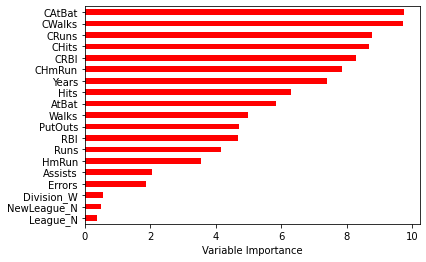

In [32]:
Importance=pd.DataFrame({'Importance':rf_tuned.feature_importances_*100},
                        index=X_train.columns)    #Importance adında dataframe oluşturuyor

Importance.sort_values(by='Importance',
                       axis=0,
                       ascending=True).plot(kind='barh',
                                            color='r',)
plt.xlabel('Variable Importance')
plt.gca().legend_=None